In [4]:
import pandas as pd

df = pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
X = df.drop(columns=["MEDV"])  
y = df["MEDV"]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
import numpy as np

class LinearRegressionScratch:
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

linreg = LinearRegressionScratch()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)
y_pred_lr


array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(y_true, y_pred, name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> RMSE: {rmse:.3f}, R²: {r2:.3f}")

evaluate(y_test, y_pred_lr, name="Linear Regression")

Linear Regression -> RMSE: 4.929, R²: 0.669


In [17]:
from sklearn.tree import DecisionTreeRegressor

class SimpleRandomForest:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y.to_numpy()[indices]
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(preds, axis=0)

rf = SimpleRandomForest(n_estimators=10, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate(y_test, y_pred_rf, name="Random Forest")

Random Forest -> RMSE: 2.933, R²: 0.883


In [27]:
class SimpleGradientBoosting:
    def __init__(self, n_estimators=10, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.init_pred = None

    def fit(self, X, y):
        self.init_pred = np.mean(y)
        pred = np.full_like(y, self.init_pred, dtype=float)

        for _ in range(self.n_estimators):
            residual = y - pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            update = tree.predict(X)
            pred += self.learning_rate * update
            self.models.append(tree)

    def predict(self, X):
        pred = np.full((X.shape[0],), self.init_pred, dtype=float)
        for tree in self.models:
            pred += self.learning_rate * tree.predict(X)
        return pred

gb = SimpleGradientBoosting(n_estimators=20, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

evaluate(y_test, y_pred_gb, name="XGBoost (Simple)")

XGBoost (Simple) -> RMSE: 3.217, R²: 0.859


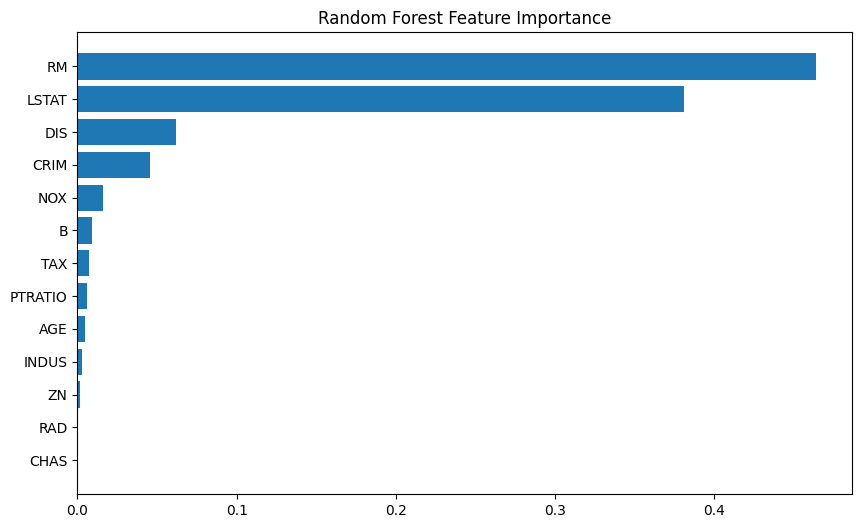

In [29]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, feature_names):
    importances = np.mean([tree.feature_importances_ for tree in model.trees], axis=0)
    sorted_idx = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(importances)), importances[sorted_idx], align='center')
    plt.yticks(range(len(importances)), np.array(feature_names)[sorted_idx])
    plt.title("Random Forest Feature Importance")
    plt.show()

plot_feature_importance(rf, df.columns[:-1])
